In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp_local = np.zeros((6 * 7, 3), np.float32)
objp_local[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1, 2)

p_topleft = np.array([30, 11, 51.26]) # world coordinate, unit mm
x_axis_marker = np.array([[0., 0., -1.]]) # x-axis in world frame, axis with 7 points 
y_axis_marker = np.array([[0., -1., 0.]]) # y-axis in world frame, axis with 6 points
marker_size = 4.4 # unit mm

# prepare world coordinate
objp = np.zeros((6 * 7, 3), np.float32)
objp = p_topleft + \
    objp_local[:, [0]] * x_axis_marker * marker_size + \
    objp_local[:, [1]] * y_axis_marker * marker_size

objp = np.array(objp, dtype=np.float32)

mXw = np.array(
[
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [-1, 0, 0, 30],
    [0, 0, 0, 1]
])

wXm = np.linalg.inv(mXw)

def transform(X, p):
    ret = X.dot(np.hstack([p, np.ones((p.shape[0], 1))]).T).T[:, :3]
    return ret.astype(np.float32)

def w2m(p):
    return transform(mXw, p)

def m2w(p):
    return transform(wXm, p)

objp_marker = w2m(objp)
objp_world = m2w(objp_marker)

0 data/chessboard_03052021_2/20210305_120731.jpg


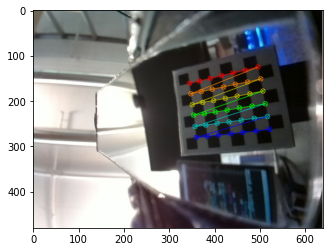

1 data/chessboard_03052021_2/20210305_120830.jpg


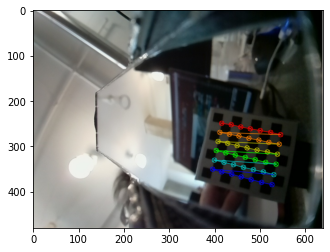

2 data/chessboard_03052021_2/20210305_120835.jpg


3 data/chessboard_03052021_2/20210305_120729.jpg


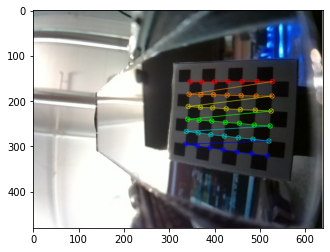

4 data/chessboard_03052021_2/origin.jpg


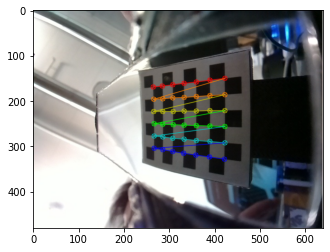

5 data/chessboard_03052021_2/20210305_120908.jpg


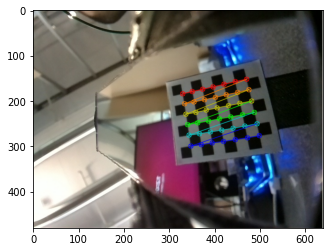

6 data/chessboard_03052021_2/20210305_120919.jpg


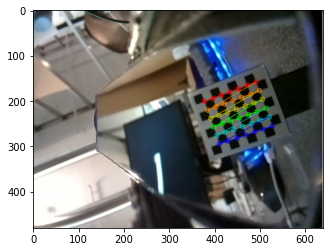

7 data/chessboard_03052021_2/20210305_120913.jpg


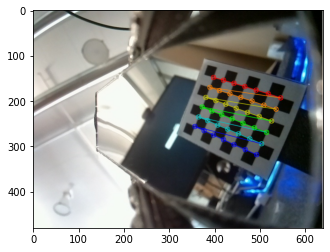

8 data/chessboard_03052021_2/20210305_120929.jpg


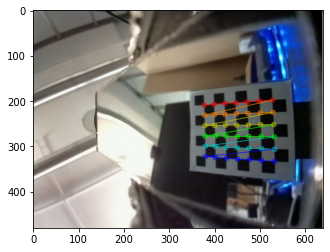

9 data/chessboard_03052021_2/20210305_120730.jpg


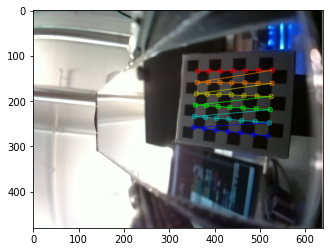

10 data/chessboard_03052021_2/20210305_120916.jpg


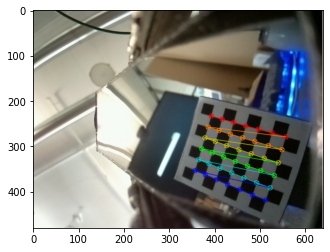

11 data/chessboard_03052021_2/20210305_120727.jpg


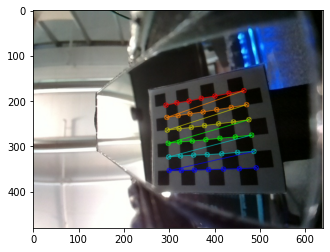

12 data/chessboard_03052021_2/20210305_120925.jpg


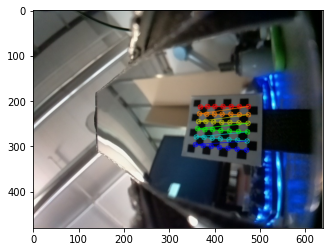

13 data/chessboard_03052021_2/20210305_120847.jpg


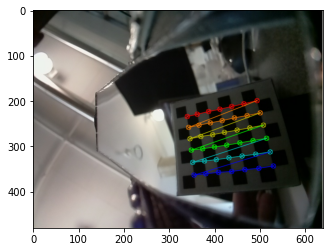

14 data/chessboard_03052021_2/20210305_120922.jpg


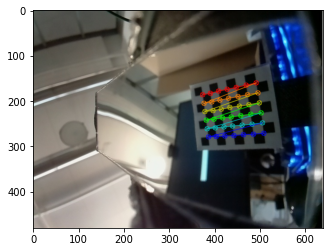

15 data/chessboard_03052021_2/20210305_120826.jpg


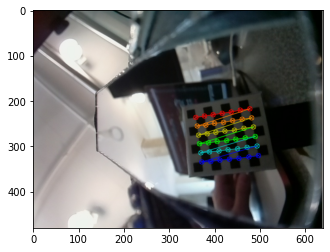

16 data/chessboard_03052021_2/20210305_120910.jpg


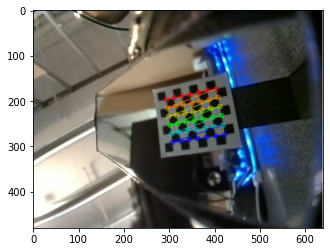

17 data/chessboard_03052021_2/20210305_120911.jpg


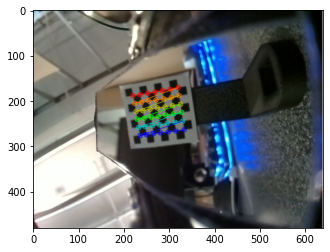

18 data/chessboard_03052021_2/20210305_120927.jpg


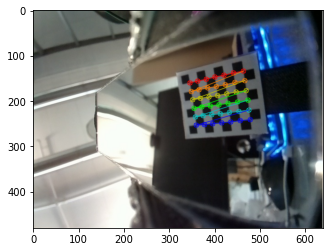

19 data/chessboard_03052021_2/20210305_120907.jpg


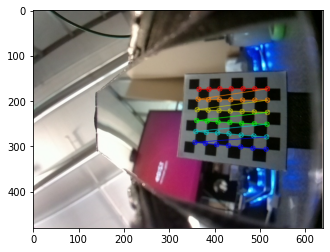

20 data/chessboard_03052021_2/20210305_120757.jpg


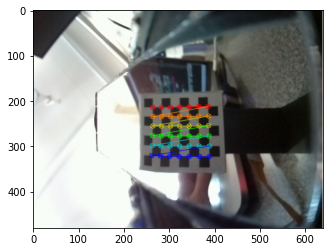

21 data/chessboard_03052021_2/20210305_120828.jpg


22 data/chessboard_03052021_2/20210305_120936.jpg


23 data/chessboard_03052021_2/20210305_120734.jpg


24 data/chessboard_03052021_2/20210305_120934.jpg


25 data/chessboard_03052021_2/20210305_120840.jpg


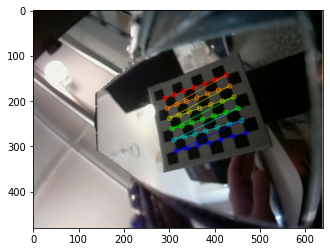

26 data/chessboard_03052021_2/20210305_120938.jpg


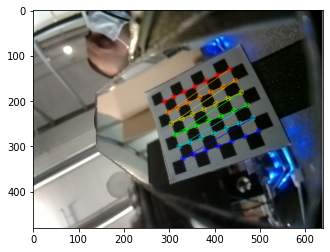

27 data/chessboard_03052021_2/20210305_120841.jpg


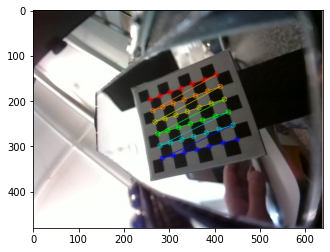

28 data/chessboard_03052021_2/20210305_120848.jpg


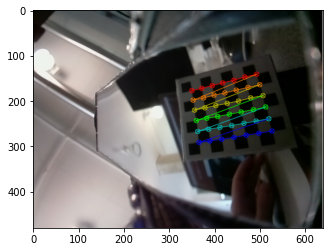

29 data/chessboard_03052021_2/20210305_120928.jpg


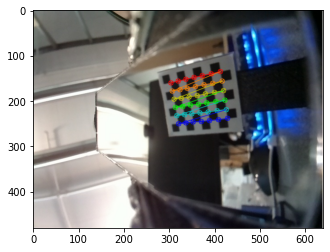

30 data/chessboard_03052021_2/20210305_120733.jpg


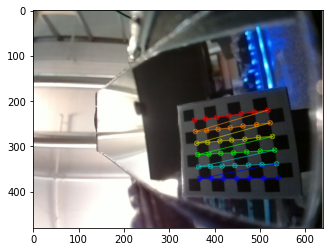

31 data/chessboard_03052021_2/20210305_120824.jpg


origin id 4


In [2]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


# Arrays to store object points and image points from all the images.
objpoints = []  # 3d point in real world space
imgpoints = []  # 2d points in image plane.

images = glob.glob("data/chessboard_03052021_2/*.jpg")
raw_images = []
origin_id = -1

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7, 6), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        raw_images.append(img.copy())
        if "origin" in fname.split("/")[-1]:
            origin_id = len(objpoints)
        print(len(objpoints), fname)
        objpoints.append(objp_marker)

        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7, 6), corners2, ret)
        plt.figure()
        plt.imshow(img[:,:,::-1])
        plt.show()
#         cv2.imshow("img", img)
#         cv2.waitKey(1)

print("origin id", origin_id)
cv2.destroyAllWindows()

In [3]:
img_origin = raw_images[origin_id]
plt.imshow(img_origin[:,:,::-1])

In [4]:

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, gray.shape[::-1], None, None
)
print(mtx)

[[348.82201674   0.         310.04344115]
 [  0.         356.83262247 219.74799955]
 [  0.           0.           1.        ]]


In [5]:
tvecs[origin_id], rvecs[origin_id]

(array([[34.5644827 ],
        [ 2.04652065],
        [29.29435195]]),
 array([[ 1.85743542],
        [-1.87106465],
        [-0.56135555]]))

In [6]:
from scipy.spatial.transform import Rotation as R

for idx in range(1):
    ori = cv2.Rodrigues(rvecs[idx])[0]
    pos = tvecs[idx]
    
    r = R.from_rotvec(rvecs[idx].T)
    print(idx)
#     print(pos)
    print(ori)
    print(r.as_euler('xyz', degrees=True))

0
[[-0.11255752 -0.90717316 -0.40542282]
 [-0.98357384  0.15966578 -0.08419821]
 [ 0.14111451  0.38928614 -0.91024337]]
[[156.84493224  -8.1123432  -96.52837393]]


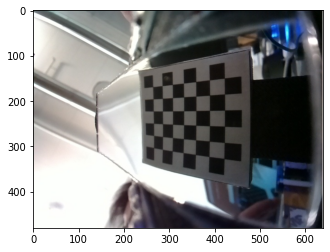

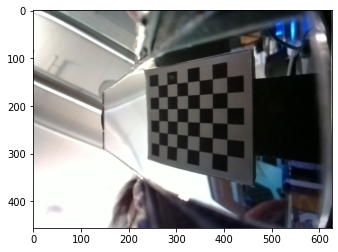

In [7]:
# img = cv2.imread('data/chessboard/20210201_114637.jpg')
img = img_origin.copy()

h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
# dst = dst[y:y+h, x:x+w]
# cv2.imwrite('calibresult.png',dst)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
# cv2.imwrite('calibresult.png',dst)
plt.imshow(img[:,:,::-1])
plt.show()
plt.imshow(dst[:,:,::-1])
plt.show()

In [8]:
tot_error = 0
for i in range(len(objpoints)):
#     dist_zero = np.zeros((1,5))
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error

print("total error: ", tot_error/len(objpoints))

total error:  0.04087193556193702


In [9]:
ro = 35.4/2
theta = np.linspace(-np.pi/4, np.pi/4, 10)
z = np.linspace(20, 53.8, 10)
tt, zz = np.meshgrid(theta, z)
xx = ro * np.cos(tt)
xx = np.reshape(xx, (-1, 1))
yy = ro * np.sin(tt)
yy = np.reshape(yy, (-1, 1))
zz = np.reshape(zz, (-1, 1))
p_cylinder_world = np.hstack([xx, yy, zz])
p_cylinder_marker = w2m(p_cylinder_world)


In [10]:
idx = origin_id

ori = cv2.Rodrigues(rvecs[idx])[0]
extrinsic = np.hstack([ori, tvecs[i]])
print(extrinsic)

x = np.hstack([p_cylinder_marker[20].T, 1])
x = np.array([x]).T
# print(x)
img_xyz = mtx.dot(extrinsic.dot(x))



# imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
imgpoints2, _ = cv2.projectPoints(p_cylinder_marker, rvecs[origin_id], tvecs[origin_id], mtx, dist)
print(imgpoints2[20])

print(img_xyz[:2] / img_xyz[-1])
# print(imgpoints[i][0])

[[ 1.01728022e-03 -8.19975575e-01 -5.72397608e-01  6.26163389e+01]
 [-9.99648956e-01  1.43204424e-02 -2.22910368e-02 -2.47958366e+00]
 [ 2.64750927e-02  5.72219347e-01 -8.19673159e-01  7.02263291e+01]]
[[332.44452 386.4611 ]]
[[456.98268959]
 [269.97078905]]


In [11]:
id = "2"
np.savez(f"camera_parameters_{id}",
         intrinsic=mtx, 
         rvec=rvecs[origin_id], 
         tvec=tvecs[origin_id], 
         dist=dist, 
         mXw=mXw,
         wXm=wXm
        )

In [12]:
data = np.load(f"camera_parameters_{id}.npz")
intrinsic, rvec, tvec, dist, mXw, wXm = data["intrinsic"], data["rvec"], data["tvec"], data["dist"], data["mXw"], data["wXm"]

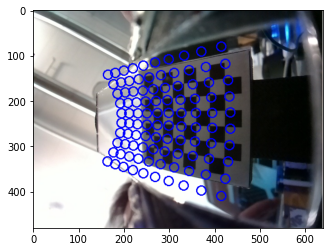

In [13]:
image = img.copy()
# image = dst.copy()

# Center coordinates
center_coordinates = (120, 50)
center_coordinates = (481, 322)

# i, j = 0, 0


for j in range(p_cylinder_marker.shape[0]):
    center_coordinates = (int(imgpoints2[j][0, 0]+0.5), int(imgpoints2[j][0, 1]+0.5))
    if center_coordinates[0] < 0 or center_coordinates[1] < 0:
        continue
#     print(center_coordinates)
    # center_coordinates = (498, 335)

    # center_coordinates = (322, 481)

    # Radius of circle
    radius = 10

    # Blue color in BGR
    color = (255, 0, 0)

    # Line thickness of 2 px
    thickness = 2

    # Using cv2.circle() method
    # Draw a circle with blue line borders of thickness of 2 px
    image = cv2.circle(image, center_coordinates, radius, color, thickness)

plt.imshow(image[:,:,::-1])